# ***Load Data***

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the datasets, obtained from https://www.kaggle.com/datasets/marikastewart/employee-turnover/data
df=pd.read_csv('/content/employee-turnover.csv')

In [ ]:
#Quick inspection on the structure and contents of the dataframe
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [ ]:
#Concise summary of the types of data existed in the dataset and checking on the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [ ]:
#Projecting descriptive statistics of the numeric columns
df.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


In [ ]:
#Converting 'left' from string values of 'no','yes' to binary values of '0','1'
df['left'] = df['left'].map({'yes': 1, 'no': 0}).astype(float)
print(df.dtypes)

department        object
promoted           int64
review           float64
projects           int64
salary            object
tenure           float64
satisfaction     float64
bonus              int64
avg_hrs_month    float64
left             float64
dtype: object


# ***EDA (EXPLORATORY DATA ANALYSIS)***

In [ ]:
#Inspecting the dimension of dataframe, the following dataframe consists of 9540 rows and 10 columns
df.shape

(9540, 10)

In [ ]:
#0.0 indicates employees that remains, whereas 1.0 indicates employees that left
df['left'].value_counts()

0.0    6756
1.0    2784
Name: left, dtype: int64

In [ ]:
#Calculating the mean of categorical data 'left'
df.groupby('left').mean()

<ipython-input-9-939bda777d2a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
left,,,,,,,
0.0,0.034340,0.635164,3.279455,6.546625,0.505634,0.215068,184.637605
1.0,0.020474,0.692262,3.263649,6.579382,0.502244,0.204741,184.719730


In [ ]:
#Calculating the mean of categorical data 'department'
df.groupby('department').mean()

<ipython-input-10-53fae40fcc81>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('department').mean()


,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,left
department,,,,,,,,
IT,0.022472,0.647746,3.289326,6.609551,0.515818,0.221910,184.820946,0.308989
admin,0.037825,0.647086,3.278960,6.498818,0.519444,0.186761,184.538120,0.281324
engineering,0.023087,0.650601,3.263852,6.558047,0.504944,0.211082,184.691962,0.288259
finance,0.047264,0.654934,3.293532,6.440299,0.497183,0.231343,184.375116,0.268657
logistics,0.019444,0.654374,3.275000,6.527778,0.493084,0.208333,184.589924,0.308333
marketing,0.042394,0.657694,3.280549,6.503741,0.502411,0.219451,184.469963,0.302993
operations,0.029566,0.653397,3.271353,6.608410,0.504620,0.206965,184.812006,0.286465
retail,0.033744,0.650152,3.266061,6.591175,0.502769,0.218689,184.735075,0.305646
sales,0.026553,0.651631,3.286245,6.535847,0.504520,0.211896,184.616739,0.285183


In [ ]:
#Calculating the mean of categorical data 'salary'
df.groupby('salary').mean()

<ipython-input-11-0c15b44cc565>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('salary').mean()


,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,left
salary,,,,,,,,
high,0.029716,0.651642,3.260336,6.580749,0.502463,0.213824,184.766428,0.285530
low,0.028965,0.652816,3.304852,6.556119,0.504934,0.225199,184.657057,0.283128
medium,0.030706,0.651663,3.271971,6.550446,0.505095,0.208894,184.637961,0.295114


##***Data Visualizations***

###***Bar charts***

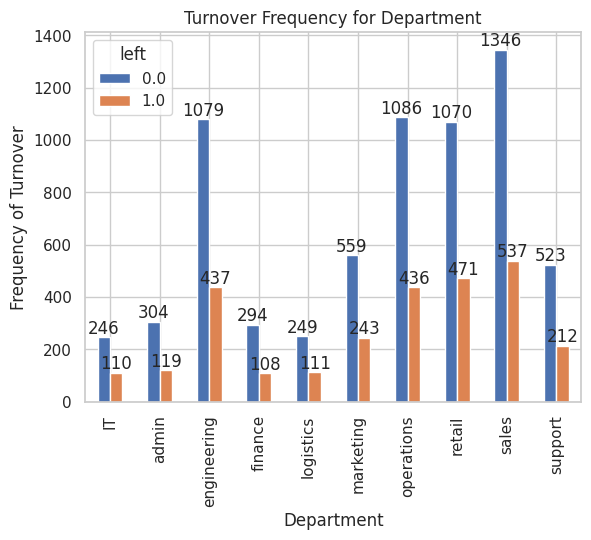

In [ ]:
table = pd.crosstab(df.department, df.left)
ax = table.plot(kind='bar')

plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height), ha='center', va='bottom')

plt.savefig('department_bar_chart_with_values')
plt.show()

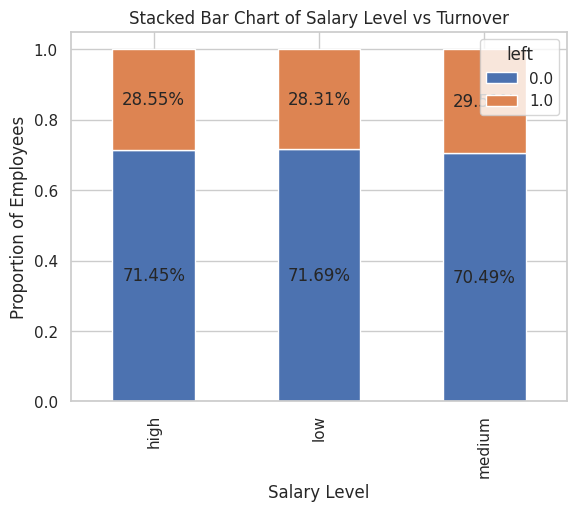

In [ ]:
table=pd.crosstab(df.salary, df.left)
prop_table = table.div(table.sum(1).astype(float), axis=0)

ax = prop_table.plot(kind='bar', stacked=True)

plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height/2), ha='center', va='center')

plt.savefig('salary_bar_chart_with_values')
plt.show()

###***Histograms for numeric variables***

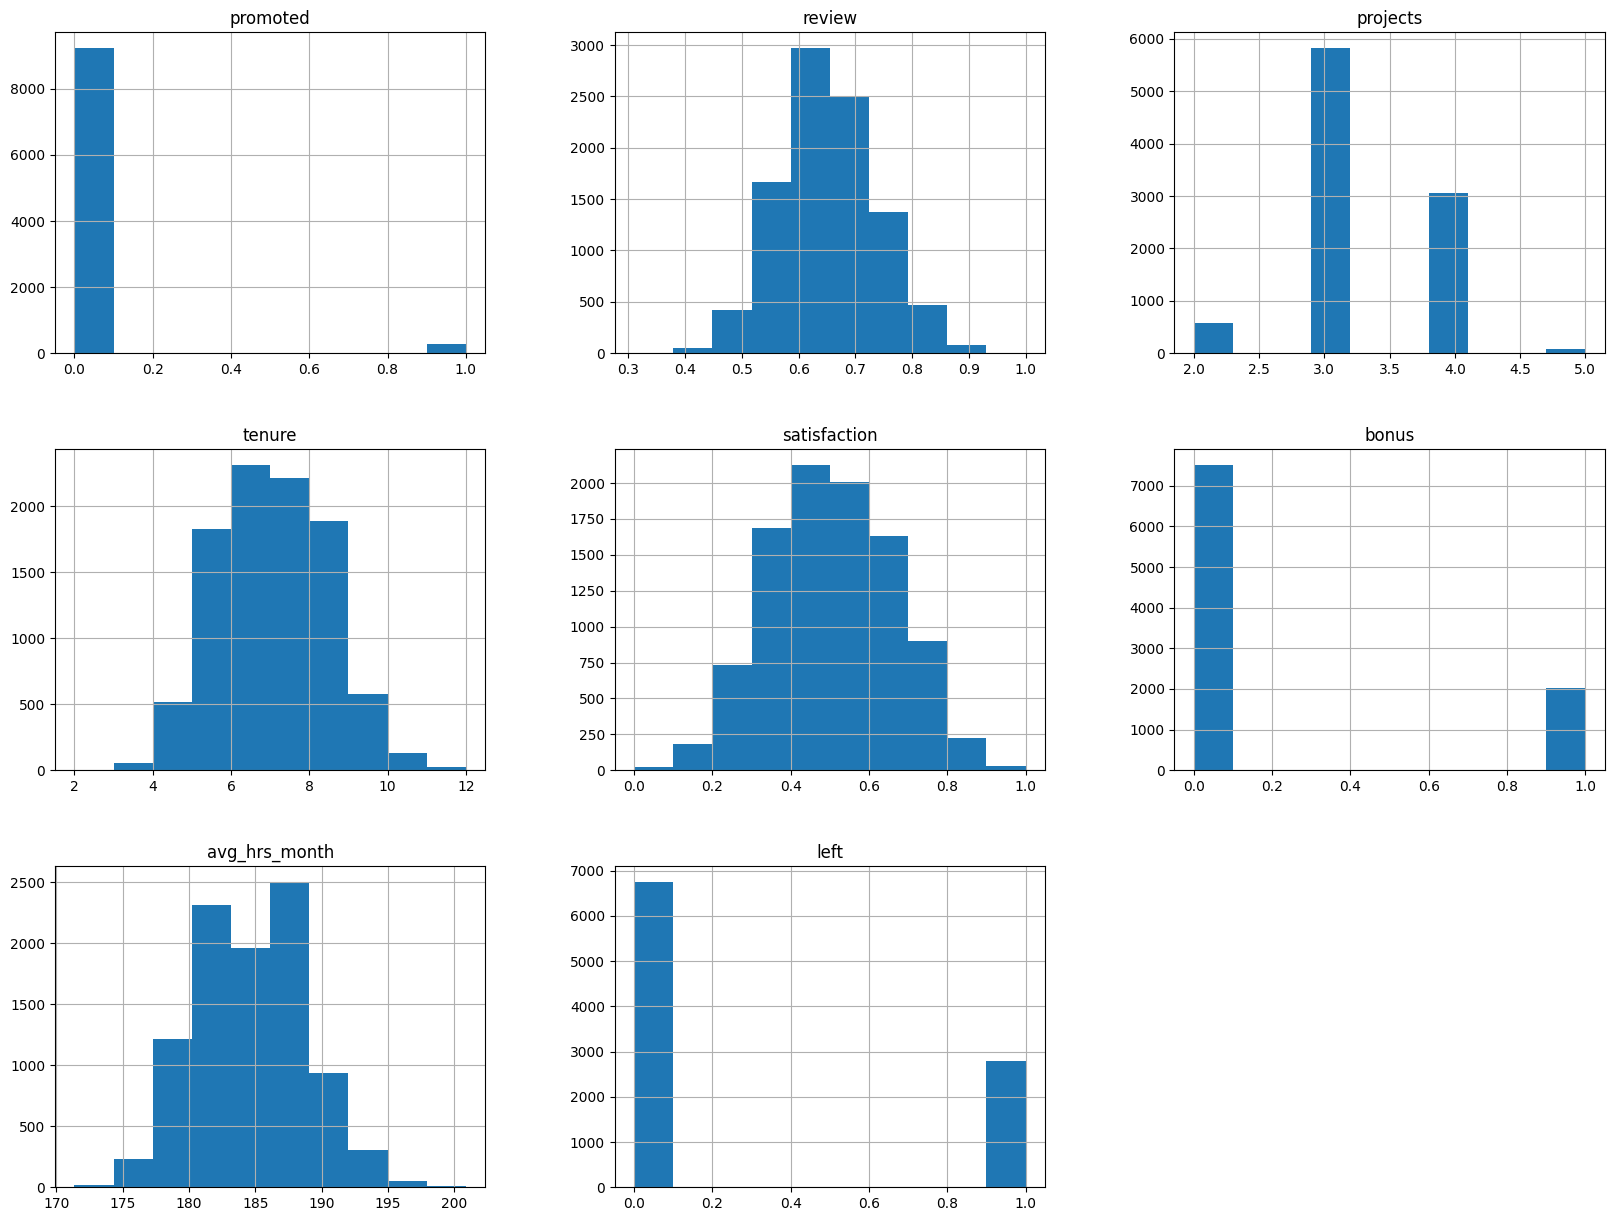

In [ ]:
#Plotting Histograms for the rest of the variables
num_bins = 10
df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("df_histogram_plots")
plt.show()

###***Boxplots for numeric variables***

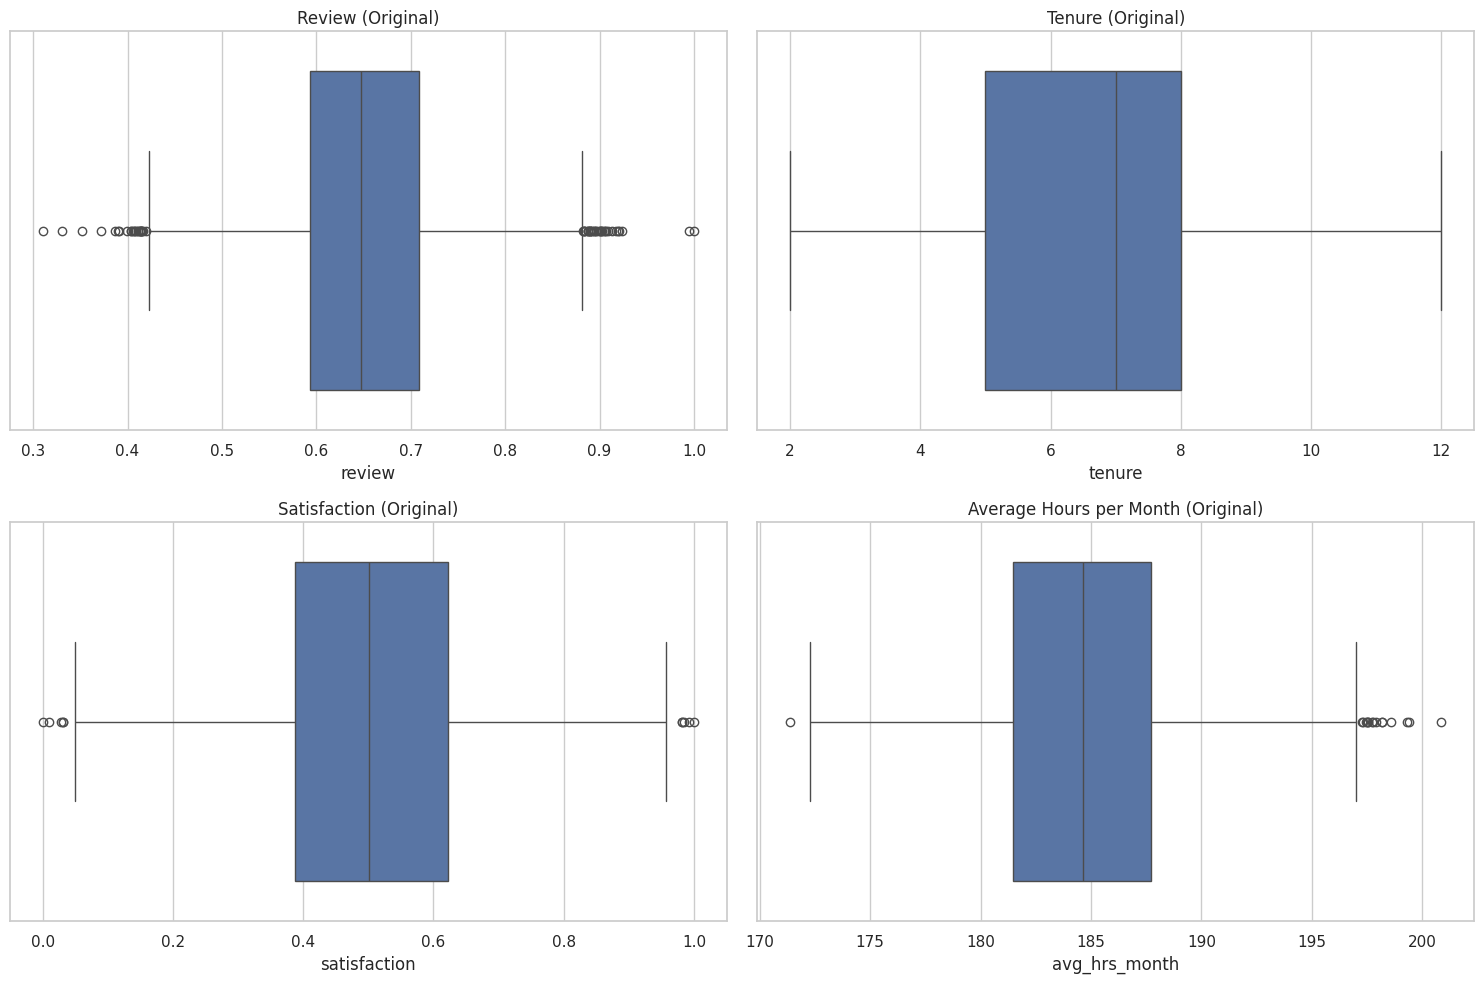

In [ ]:
#'Review, Tenure, Satisfaction, Average hours per month are numerical values that are vary in range, these variables are pron to be invulnerable to the possibilities of having outliers.
# Set the style of seaborn for better visibility
sns.set(style="whitegrid")

# Creating box plots for selected columns in the original dataset
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.boxplot(x=df['review'], ax=axes[0, 0])
axes[0, 0].set_title('Review (Original)')

sns.boxplot(x=df['tenure'], ax=axes[0, 1])
axes[0, 1].set_title('Tenure (Original)')

sns.boxplot(x=df['satisfaction'], ax=axes[1, 0])
axes[1, 0].set_title('Satisfaction (Original)')

sns.boxplot(x=df['avg_hrs_month'], ax=axes[1, 1])
axes[1, 1].set_title('Average Hours per Month (Original)')

plt.tight_layout()
plt.show()

### ***Removing outliers***

In [ ]:
# IQR method to remove the outliers.
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to the dataset
columns_to_check = ['review', 'tenure', 'satisfaction', 'avg_hrs_month']
df_clean = df.copy()

for column in columns_to_check:
    df_clean = remove_outliers_iqr(df_clean, column)

# Display the shape of the original and the cleaned dataset to see how many rows were removed
original_shape = df.shape
cleaned_shape = df_clean.shape

original_shape, cleaned_shape

((9540, 10), (9457, 10))

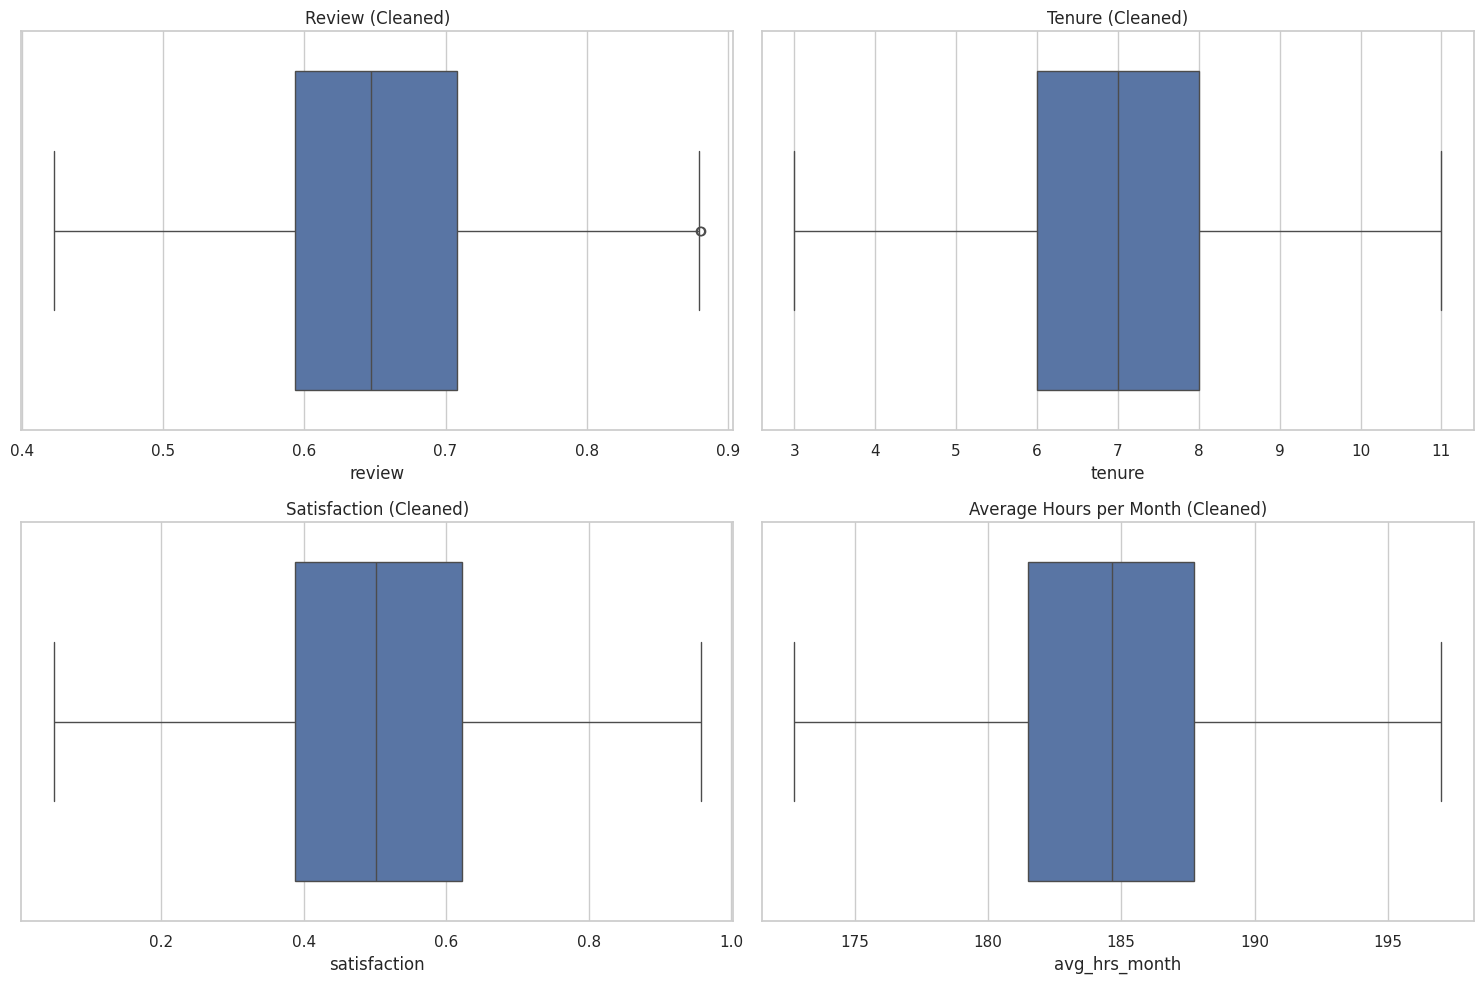

In [ ]:
# Cleaned Boxplots
# Set the style of seaborn for better visibility
sns.set(style="whitegrid")

# Creating box plots for selected columns in the cleaned dataset
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.boxplot(x=df_clean['review'], ax=axes[0, 0])
axes[0, 0].set_title('Review (Cleaned)')

sns.boxplot(x=df_clean['tenure'], ax=axes[0, 1])
axes[0, 1].set_title('Tenure (Cleaned)')

sns.boxplot(x=df_clean['satisfaction'], ax=axes[1, 0])
axes[1, 0].set_title('Satisfaction (Cleaned)')

sns.boxplot(x=df_clean['avg_hrs_month'], ax=axes[1, 1])
axes[1, 1].set_title('Average Hours per Month (Cleaned)')

plt.tight_layout()
plt.show()

#***Creating dummy variables for categorical variables***

In [ ]:
#Generating dummy variables for department and salary, to allow the machine learning to perform analysis
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_clean[var], prefix=var)
    df_clean=df_clean.join(cat_list)

In [ ]:
#Since we have created dummy variables for department and salary, we then remove those original categorical variables (department and salary)
#to avoid multicollinearity issues and redundancy in the dataset.
df_clean.drop(df_clean.columns[[0, 4]], axis=1, inplace=True)
df_clean.columns.values

array(['promoted', 'review', 'projects', 'tenure', 'satisfaction',
       'bonus', 'avg_hrs_month', 'left', 'department_IT',
       'department_admin', 'department_engineering', 'department_finance',
       'department_logistics', 'department_marketing',
       'department_operations', 'department_retail', 'department_sales',
       'department_support', 'salary_high', 'salary_low', 'salary_medium'],
      dtype=object)

In [ ]:
#To classify (left),'y' as the outcome of the study and 'x' as the predictor of the outcome
df_clean_vars=df_clean.columns.values.tolist()
y=['left']
X=[i for i in df_clean_vars if i not in y]

#***Recursive Feature Elimination***

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(kernel='linear')}

for name, model in models.items():
    rfe = RFE(model, n_features_to_select=10)
    rfe = rfe.fit(df_clean[X], df_clean[y].values.ravel())
    selected_features = df_clean[X].columns[rfe.support_]
    print(f"Model: {name}")
    print("Selected Features:")
    print(selected_features.tolist())  # Convert to list for better readability
    print()


Model: Logistic Regression
Selected Features:
['promoted', 'review', 'tenure', 'satisfaction', 'department_admin', 'department_engineering', 'department_finance', 'department_operations', 'department_sales', 'department_support']

Model: Random Forest
Selected Features:
['review', 'projects', 'tenure', 'satisfaction', 'bonus', 'avg_hrs_month', 'department_engineering', 'department_operations', 'department_sales', 'salary_medium']

Model: SVM
Selected Features:
['promoted', 'review', 'satisfaction', 'bonus', 'department_IT', 'department_admin', 'department_logistics', 'department_support', 'salary_high', 'salary_medium']



In [ ]:
#Listing out the necessary variables of x and y. (x,cols) = are columns of independent variables that are being tested out. y= the dependent variables that are being measured.
#The following selection of variables are in favor of random forest model through experimenting its accuracies, precision & recall , and ROC. Through all the variables that were projected in different models
#Random forest brought out the best accuracies averaging above .8% among all models that were tested, thus justifying the choice of choosing its variables as our main concentration of the studies.
cols=['review', 'projects', 'tenure', 'satisfaction', 'bonus', 'avg_hrs_month', 'department_engineering', 'department_operations', 'department_sales', 'salary_medium']
X=df_clean[cols]
y=df_clean['left']

#***Model Building***

##***Splitting datasets into training and testing***

In [ ]:
#Splitting datasets where (0.2)20% of dataset will be used for testing , the rest of (0.8)80% will be used for training
#Random state of 42 to make sure the splits of the data is the same and generating reproducible results. Similar to set.seed.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##***Random Forest Classification***

In [ ]:
#Importing Random Forest classification model and perform model training
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#From the trained model, the Random Forest Classification accuracy score displays how well the model predicted the outcome of tested data
#Random Forest Classification stands the highest at 0.864
from sklearn.metrics import accuracy_score
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.864


##***Logistic Regression Model***

In [ ]:
#Importing Logistic regression model and perform model training
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(max_iter=1000,random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
#From the trained model, the logistic regression accuracy score displays how well the model predicted the outcome of tested data
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.734


##***Support Vector Machine***

In [ ]:
#Importing Support Vector Machine model and perform model training
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
#From the trained model, the support vector machine accuracy score displays how well the model predicted the outcome of tested data
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svm.predict(X_test))))


Support vector machine accuracy: 0.707


# ***Model Evaluation Metrics***


#***K-Fold Cross Validation***

In [ ]:
#K-fold cross validation
#This splits the dataset into 10 consecutive folds and uses each fold as a testing set while the remaining folds are used for training.
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, shuffle=True)
modelCV1 = RandomForestClassifier(random_state=42)
modelCV2 = LogisticRegression(max_iter=10000, solver='lbfgs',random_state=42)
modelCV3 = SVC(random_state=42)
scoring = 'accuracy'
results1 = model_selection.cross_val_score(modelCV1, X_train, y_train, cv=kfold, scoring=scoring)
results2 = model_selection.cross_val_score(modelCV2, X_train, y_train, cv=kfold, scoring=scoring)
results3 = model_selection.cross_val_score(modelCV3, X_train, y_train, cv=kfold, scoring=scoring)
print("Random Forest 10-fold cross validation average accuracy: %.3f" % (results1.mean()))
print("Logistic Regression 10-fold cross validation average accuracy: %.3f" % (results2.mean()))
print("SVC 10-fold cross validation average accuracy: %.3f" % (results3.mean()))

Random Forest 10-fold cross validation average accuracy: 0.862
Logistic Regression 10-fold cross validation average accuracy: 0.725
SVC 10-fold cross validation average accuracy: 0.710


#***Precision and recall***

> Usage of precision and recall are appropriate when it comes to investigating accuracy of imbalance datasets.



##***Random Forest Classification***

In [ ]:
#Summary of the performance of classification model projecting f1-score of 0.91 of employee remain and f1-score of 0.75 employee leaving
#However the model shows an imbalances of data due to the nature of dataset having more employee remaining than employee leaving.
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      1337
         1.0       0.81      0.70      0.75       555

    accuracy                           0.86      1892
   macro avg       0.85      0.82      0.83      1892
weighted avg       0.86      0.86      0.86      1892



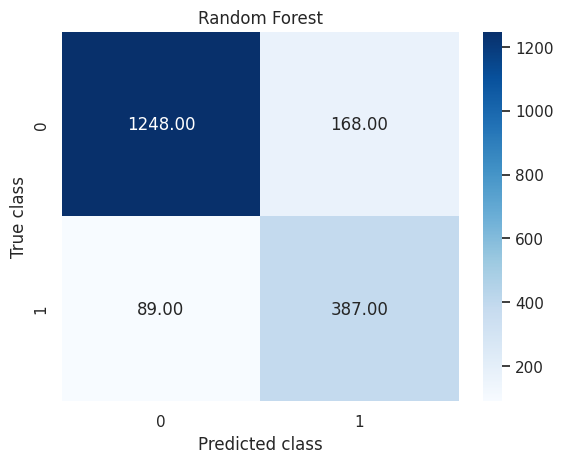

In [ ]:
#Projecting heatmap visualization of confusion matrix, random forest retrieved a 1248 out of 1337 employee remained , 387 out of 555
#employee leaving. Translates to 93% of employee remained and 69% of employee leaving.
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mtx = confusion_matrix(y_pred, y_test)
sns.heatmap(confusion_mtx, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Random Forest')
plt.savefig('Random_Forest')
plt.show()

##***Logistic Regression***

In [ ]:
#Summary of the logistic regression model projecting f1-score of 0.84 of employee remain and f1-score of 0.28 employee leaving
#Indicating Random forest had a better accuracy prediction than logistic regression.
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.74      0.97      0.84      1337
         1.0       0.68      0.17      0.28       555

    accuracy                           0.73      1892
   macro avg       0.71      0.57      0.56      1892
weighted avg       0.72      0.73      0.67      1892



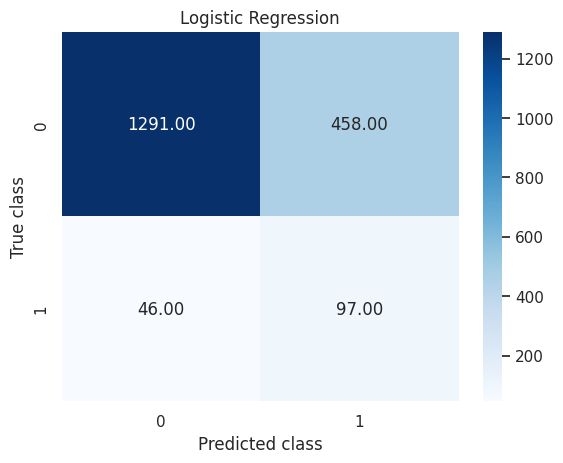

In [ ]:
#Projecting heatmap visualization of confusion matrix, random forest retrieved a 1291 out of 1337 employee remained , 97 out of 555
#employee leaving. Translates to 96% of employee remained and 17% of employee leaving.
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test)
sns.heatmap(logreg_cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')
plt.show()

##***Support Vector Machine***

In [ ]:
print(classification_report(y_test, svm.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83      1337
         1.0       0.00      0.00      0.00       555

    accuracy                           0.71      1892
   macro avg       0.35      0.50      0.41      1892
weighted avg       0.50      0.71      0.59      1892



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


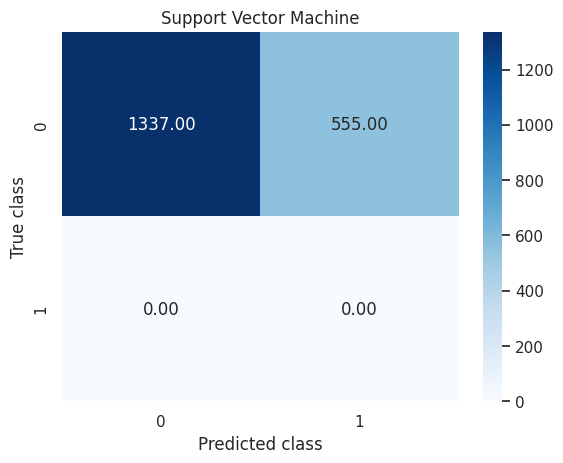

In [ ]:
svm_y_pred = svm.predict(X_test)
svm_cm = metrics.confusion_matrix(svm_y_pred, y_test)
sns.heatmap(svm_cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')
plt.show()

#***Receiver Operating Characteristic (ROC)***

> Usage of ROC are appropriate when it comes to investigating accuracy of Balanced datasets.



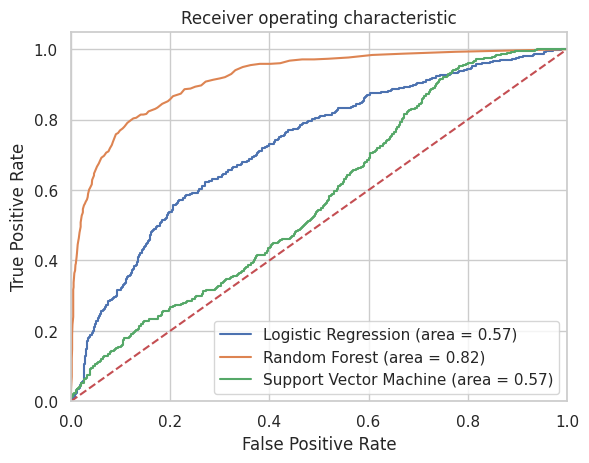

In [ ]:
#The following curve gives an insight of performances of binary classification model
#The closer the curve to the upper left corner indicates a better model performance
#The area = 0.81 known as AUC(Area under curve)- ROC suggests that the model has the ability to
#Separate the classes more effectively as it goes higher.
#https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/ < reference
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_roc_auc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

#***SMOTE***

In [ ]:
#SMOTE test implemented to solve the imbalances of data
from imblearn.over_sampling import SMOTE

In [ ]:
#SMOTE test balances the class distribution by generating synthetic samples for the minority class
smote = SMOTE(random_state=42)
smote_X_train, smote_y_train = smote.fit_resample(X_train, y_train)
X_smote_test, y_smote_test = smote.fit_resample(X_test, y_test)

In [ ]:
#Results of SMOTE after solving the imbalances between employee leaving and employee remained.
!pip install collections
from collections import Counter
print('Before sampling class distribution:-',Counter(y_train))
print('After sampling class distribution:-',Counter(smote_y_train))

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections
Before sampling class distribution:- Counter({0.0: 5374, 1.0: 2191})
After sampling class distribution:- Counter({0.0: 5374, 1.0: 5374})


##***Smote K-Fold Cross Validation***

In [ ]:
kfold = model_selection.KFold(n_splits=10, shuffle=True)
modelCV1 = RandomForestClassifier(random_state=42)
modelCV2 = LogisticRegression(max_iter=10000, solver='lbfgs',random_state=42)
modelCV3 = SVC(random_state=42)
scoring = 'accuracy'
results1 = model_selection.cross_val_score(modelCV1, smote_X_train, smote_y_train, cv=kfold, scoring=scoring)
results2 = model_selection.cross_val_score(modelCV2, smote_X_train, smote_y_train, cv=kfold, scoring=scoring)
results3 = model_selection.cross_val_score(modelCV3, smote_X_train, smote_y_train, cv=kfold, scoring=scoring)
print("Random Forest 10-fold cross validation average accuracy: %.3f" % (results1.mean()))
print("Logistic Regression 10-fold cross validation average accuracy: %.3f" % (results2.mean()))
print("SVC 10-fold cross validation average accuracy: %.3f" % (results3.mean()))

Random Forest 10-fold cross validation average accuracy: 0.887
Logistic Regression 10-fold cross validation average accuracy: 0.675
SVC 10-fold cross validation average accuracy: 0.518


##***SMOTE Random Forest Classification***

In [ ]:
#Random Forest Classifier model training
rf = RandomForestClassifier(random_state=42)
rf.fit(smote_X_train, smote_y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Predicting the data using trained model
#Results has shown a desireable f1-score of employee leaving at .83
#Accuracy .84 < shall be the concentration to tells us how accurate the model predicts employee turnover
y_pred = rf.predict(X_smote_test)
print(classification_report(y_smote_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      1337
         1.0       0.85      0.81      0.83      1337

    accuracy                           0.84      2674
   macro avg       0.84      0.84      0.84      2674
weighted avg       0.84      0.84      0.84      2674



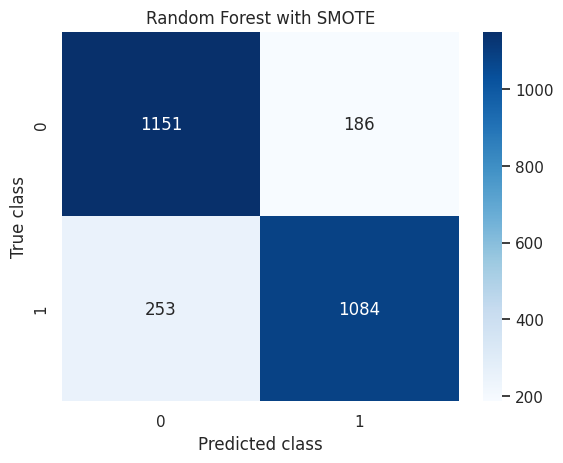

In [ ]:
#Confusion matrix provides us the prediction of trained model with an accuracy of employee leaving at (81%) 1084/1330.
confusion_mtx = confusion_matrix(y_smote_test, y_pred)
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Random Forest with SMOTE')
plt.show()

##***SMOTE Logistic Regression***


In [ ]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(smote_X_train, smote_y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
#Make predictions and evaluating the model
print(classification_report(y_smote_test, logreg.predict(X_smote_test)))

              precision    recall  f1-score   support

         0.0       0.69      0.65      0.67      1337
         1.0       0.67      0.72      0.69      1337

    accuracy                           0.68      2674
   macro avg       0.68      0.68      0.68      2674
weighted avg       0.68      0.68      0.68      2674



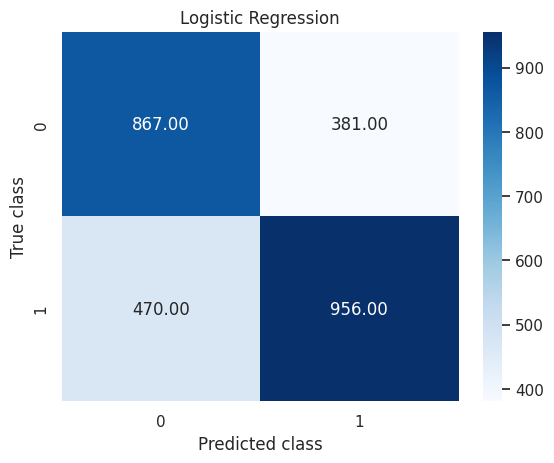

In [ ]:
logreg_y_pred = logreg.predict(X_smote_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_smote_test)
sns.heatmap(logreg_cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')
plt.show()

##***SMOTE Support Vector Machine***

In [ ]:
#Training the Support Vector machine on the resampled data
svm = SVC(random_state=42)
svm.fit(smote_X_train, smote_y_train)

SVC(random_state=42)

In [ ]:
print(classification_report(y_smote_test, svm.predict(X_smote_test)))

              precision    recall  f1-score   support

         0.0       0.55      0.46      0.51      1337
         1.0       0.54      0.63      0.58      1337

    accuracy                           0.55      2674
   macro avg       0.55      0.55      0.54      2674
weighted avg       0.55      0.55      0.54      2674



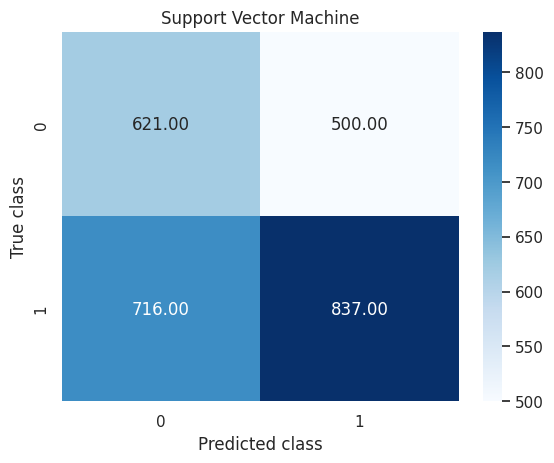

In [ ]:
svm_y_pred = svm.predict(X_smote_test)
svm_cm = metrics.confusion_matrix(svm_y_pred, y_smote_test)
sns.heatmap(svm_cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Support Vector Machine')
plt.savefig('Support Vector Machine')
plt.show()

#***Smote ROC Curve***

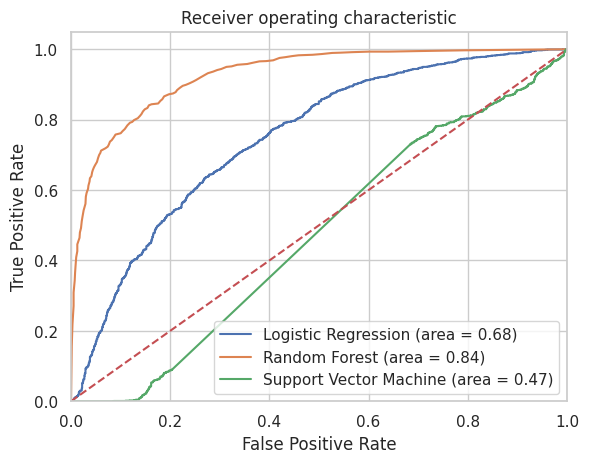

In [ ]:
#As compared to the default ROC curve, the adjustment of curve Random forest and logistic regression does not seem to have a major or rather obscure changes
#except for svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_smote_test, logreg.predict(X_smote_test))
fpr, tpr, thresholds = roc_curve(y_smote_test, logreg.predict_proba(X_smote_test)[:,1])
rf_roc_auc = roc_auc_score(y_smote_test, rf.predict(X_smote_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_smote_test, rf.predict_proba(X_smote_test)[:,1])
svm = SVC(probability=True)
svm.fit(smote_X_train, smote_y_train)
svm_roc_auc = roc_auc_score(y_smote_test, svm.predict_proba(X_smote_test)[:, 1])
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_smote_test, svm.predict_proba(X_smote_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

#***Feature Importance analysis***


In [ ]:
feature_labels = np.array(['promoted', 'review', 'tenure', 'satisfaction', 'department_admin','department_finance','department_engineering','department_operations','department_sales','department_support'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_engineering-0.82%
department_operations-0.84%
department_sales-0.93%
department_admin-1.09%
department_support-1.31%
review-2.17%
tenure-9.54%
promoted-26.15%
satisfaction-27.42%
department_finance-29.72%
